In [6]:
import pandas as pd
df = pd.read_csv('../data/MiceProtein_2f2c.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1eecd210>]],
      dtype=object)

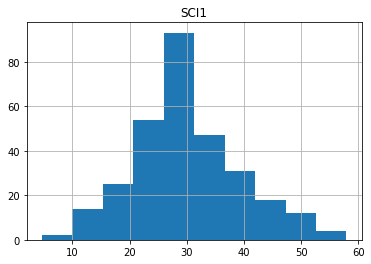

In [5]:
## Histograms of features
df.hist(column='SCI1')

In [7]:
## Priors for cP and cN
n_cN = df[df['Response'] == 'N'].shape[0]
n_cP = df[df['Response'] == 'P'].shape[0]
p_cN = n_cN / (n_cN + n_cP) 
p_cP = n_cP / (n_cN + n_cP) 
print(p_cN)
print(p_cP)

0.5
0.5


In [8]:
## Naive Bayes for Gaussian (Normal) dist'n
## Priors p_cP = p_cN = 0.5
## Calculate likelihoods for SCI1 - calculate mean and std first
df_cN = df[df['Response'] == 'N']
df_cP = df[df['Response'] == 'P']
mean_SCI1_cN = df_cN['SCI1'].mean()
std_SCI1_cN = df_cN['SCI1'].std()
print(mean_SCI1_cN)
print(std_SCI1_cN)
mean_SCI1_cP = df_cP['SCI1'].mean()
std_SCI1_cP = df_cP['SCI1'].std()
print(mean_SCI1_cP)
print(std_SCI1_cP)

25.74159597002
5.9918272965835255
34.258404029933345
9.761812069782161


In [9]:
## Calculate likelihoods for SCI1
import math
test_x=[[35, 11.5]]
p_x_cN = (1 / (math.sqrt(2 * math.pi) * std_SCI1_cN)) * math.exp((-1/2) * ((test_x[0][0] - mean_SCI1_cN) / std_SCI1_cN)**2)
print(p_x_cN)
p_x_cP = (1 / (math.sqrt(2 * math.pi) * std_SCI1_cP)) * math.exp((-1/2) * ((test_x[0][0] - mean_SCI1_cP) / std_SCI1_cN)**2)
print(p_x_cP)

0.02017899072070187
0.04055582626846548


In [10]:
## calculate evidence
p_x = p_x_cN * p_cN + p_x_cP * p_cP

In [11]:
## Calculate Posterior probabilities for the test sample
p_cN_x = p_x_cN * p_cN / p_x
p_cP_x = p_x_cP * p_cP / p_x
print(p_cN_x)
print(p_cP_x)

0.3322474936295764
0.6677525063704235


In [12]:
## Scikit Naive Bayes with SCI1 feature only
import numpy as np
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X = df[['SCI1']].values
y = df[['Response']].values
myGNB = gnb.fit(X,np.ravel(y))
y_pred = myGNB.predict([[35]])
y_pred
myGNB.predict_proba([[35]])
myGNB.sigma_

array([[35.66264781],
       [94.65768847]])

In [13]:
std_SCI1_cP**2
std_SCI1_cP**2

95.29297488574468

In [14]:
#myGNB.class_prior_
#myGNB.theta_
myGNB.sigma_ = np.array([[std_SCI1_cN**2], [std_SCI1_cP**2]])
myGNB.predict_proba([[35]])

array([[0.33118928, 0.66881072]])

In [15]:
## Scikit Naive Bayes with both features
import numpy as np
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X = df[['SCI1', 'NATR2']].values
y = df[['Response']].values
myGNB = gnb.fit(X,np.ravel(y))
y_pred = myGNB.predict([[35, 11.5]])
y_pred
myGNB.predict_proba([[35, 11.5]])
#myGNB.sigma_

array([[0.58466981, 0.41533019]])

In [16]:
## Naive Bayes with standard scaled input
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)
test_x_norm = (test_x - np.mean(X, axis=0)) / np.std(X, axis=0) 

In [19]:
myGNB = gnb.fit(X_norm,np.ravel(y))
y_pred = myGNB.predict(test_x_norm)
y_pred
myGNB.predict_proba(test_x_norm)

array([[0.58466982, 0.41533018]])

In [ ]:
## Standard scaling did not change the prediction